Lasso and Ridge regression are both regularization techniques used in linear regression to address issues like multicollinearity and overfitting by adding penalty terms to the linear regression equation. However, they have some key differences in terms of how they apply these penalties:

In [1]:
#   Penalty Term Type:

Lasso Regression (L1 regularization): Lasso stands for "Least Absolute Shrinkage and Selection Operator." It adds the absolute values of the coefficients of the features as a penalty term to the linear regression equation. The penalty term in Lasso is represented as the sum of the absolute values of the coefficients: α∑|βi|, where α is the regularization strength and βi are the coefficients of the features.

Ridge Regression (L2 regularization): Ridge, on the other hand, adds the square of the coefficients of the features as a penalty term to the linear regression equation. The penalty term in Ridge is represented as the sum of the squares of the coefficients: α∑(βi^2), where α is the regularization strength and βi are the coefficients of the features.

In [2]:
#   Effect on Coefficients:

Lasso: Lasso tends to shrink the coefficients of less important features to exactly zero, effectively performing feature selection. This means it can be used for feature selection as well as regularization.

Ridge: Ridge penalizes the coefficients but doesn't force them to zero. It tends to push the coefficients towards smaller values, which can help in reducing the impact of multicollinearity and overfitting.

In [3]:
# Differentiation and updates

The absolute value function (|x|) is not differentiable at zero. As a result, during the optimization process, when the penalty term tries to shrink a coefficient towards zero, it may "hit" zero exactly. In other words, Lasso introduces a sparsity-inducing property, which means it can lead to feature selection. When a coefficient becomes zero, it effectively removes the corresponding feature from the model.
Ridge Regularization (L2):

Ridge adds a penalty term to the loss function that is proportional to the sum of the squared coefficients: α∑(βi^2).
The squared term (x^2) is differentiable everywhere, including at zero. Therefore, when the penalty term attempts to shrink a coefficient, it can make it very close to zero, but it does not force it to become exactly zero.

In [4]:
# Sparsity:

Lasso: Lasso has a sparsity-inducing property, which means it can lead to a model with fewer features since it tends to eliminate some of the less important features by setting their coefficients to zero.

Ridge: Ridge doesn't have a sparsity-inducing property; it keeps all features in the model but reduces the impact of individual features.

In [5]:
# Solution Stability:

Lasso: Lasso can be sensitive to the scale of the features and may produce unstable results when multicollinearity is high. It may select one feature from a group of highly correlated features and exclude others.

Ridge: Ridge is more stable in the presence of multicollinearity because it doesn't tend to exclude features completely. It shrinks the coefficients of correlated features towards each other.

In [6]:
# Use Cases:

Lasso: Lasso is often preferred when feature selection is a key concern or when you suspect that many of your features are irrelevant. It can help identify the most important predictors in your model.

Ridge: Ridge is useful when multicollinearity is a problem, and you want to maintain all the features in your model but reduce their impact.

In practice, the choice between Lasso and Ridge regression (or a combination of both, known as Elastic Net) depends on the specific problem, the nature of the data, and the goals of the modeling process. Cross-validation and tuning of the regularization strength (α) are commonly used to determine which regularization technique works best for a given dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [8]:
boston_dataset = datasets.load_boston()

C:\Users\dsi224\.conda\envs\test_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [9]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
Y = raw_df.values[1::2, 2]

In [10]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
print("Data Shape: ",X.shape)

Data Shape:  (506, 13)


In [13]:
print("Target shape: ",Y.shape)

Target shape:  (506,)


In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [15]:
print("Train data shape of X = %s and Y = %s"%(X_train.shape,Y_train.shape))

Train data shape of X = (379, 13) and Y = (379,)


In [16]:
print("Test data shape of X = %s and Y = %s"%(X_test.shape,Y_test.shape))

Test data shape of X = (127, 13) and Y = (127,)


In [17]:
#instantiate a linear regression object and fit it with our training data:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,Y_train)

LinearRegression()

In [18]:
#Prediction based on validation set:
linear_regression_prediction = linear_regression_model.predict(X_test)

In [19]:
#Calculate mean squared error:
mean_squared_error = np.mean((linear_regression_prediction-Y_test)**2)
print("Mean Squared Error on validation set is: ",mean_squared_error)

Mean Squared Error on validation set is:  18.657026838922608


In [20]:
#putting coefficients in a datafram for display:
linear_regression_coefficients = pd.DataFrame()
linear_regression_coefficients["Columns"] = raw_df.columns[:-1]
linear_regression_coefficients["Coefficient Estimated"] = pd.Series(linear_regression_model.coef_)
print(linear_regression_coefficients)

   Columns  Coefficient Estimated
0        0              -0.145763
1        1               0.051998
2        2               0.096164
3        3               2.489074
4        4             -20.441760
5        5               3.514943
6        6               0.014584
7        7              -1.443369
8        8               0.331896
9        9              -0.012054


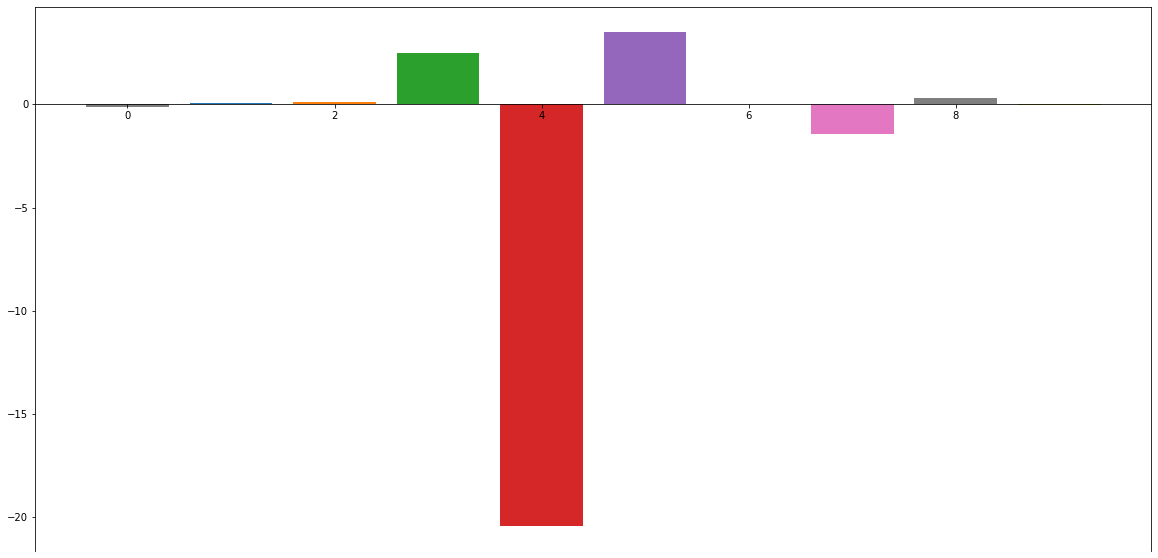

In [21]:
fig, ax = plt.subplots(figsize = (20,10))
color = ['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
        'tab:pink','tab:gray','tab:olive']
ax.bar(linear_regression_coefficients["Columns"],linear_regression_coefficients["Coefficient Estimated"],color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [22]:
#Now perform the same process with Ridge regression model:
from sklearn.linear_model import Ridge

ridge_regression_model = Ridge(alpha = 1)
ridge_regression_model.fit(X_train,Y_train)

Ridge(alpha=1)

In [23]:
ridge_regression_prediction = ridge_regression_model.predict(X_test)
mean_squared_error = np.mean((ridge_regression_prediction-Y_test)**2)
print("Mean Squared Error on validation set is: ",mean_squared_error)

Mean Squared Error on validation set is:  18.674165152910433


In [24]:
ridge_regression_coefficients = pd.DataFrame()
ridge_regression_coefficients["Columns"] = raw_df.columns[:-1]
ridge_regression_coefficients["Coefficient Estimated"] = pd.Series(ridge_regression_model.coef_)
print(ridge_regression_coefficients)

   Columns  Coefficient Estimated
0        0              -0.141409
1        1               0.053468
2        2               0.060531
3        3               2.143419
4        4             -10.235425
5        5               3.545250
6        6               0.006412
7        7              -1.300065
8        8               0.308785
9        9              -0.013063


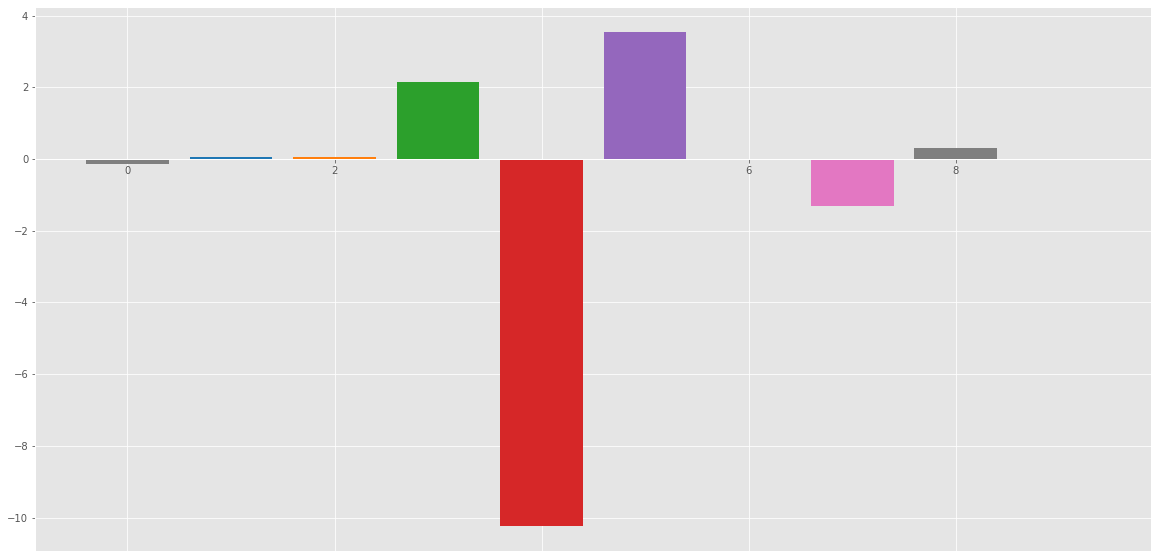

In [25]:
fig, ax = plt.subplots(figsize = (20,10))
color = ['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
        'tab:pink','tab:gray','tab:olive']
ax.bar(ridge_regression_coefficients["Columns"],ridge_regression_coefficients["Coefficient Estimated"],color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [26]:
#Now perform the same process with Lasso regression model:
from sklearn.linear_model import Lasso

lasso_regression_model = Lasso(alpha = 1)
lasso_regression_model.fit(X_train,Y_train)

Lasso(alpha=1)

In [27]:
lasso_regression_prediction = lasso_regression_model.predict(X_test)
mean_squared_error = np.mean((lasso_regression_prediction-Y_test)**2)
print("Mean Squared Error on validation set is: ",mean_squared_error)

Mean Squared Error on validation set is:  23.33508106964187


In [28]:
lasso_regression_coefficients = pd.DataFrame()
lasso_regression_coefficients["Columns"] = raw_df.columns[:-1]
lasso_regression_coefficients["Coefficient Estimated"] = pd.Series(lasso_regression_model.coef_)
print(lasso_regression_coefficients)

   Columns  Coefficient Estimated
0        0              -0.101489
1        1               0.052742
2        2               0.000000
3        3               0.000000
4        4              -0.000000
5        5               0.750260
6        6               0.030263
7        7              -0.733084
8        8               0.250046
9        9              -0.012467


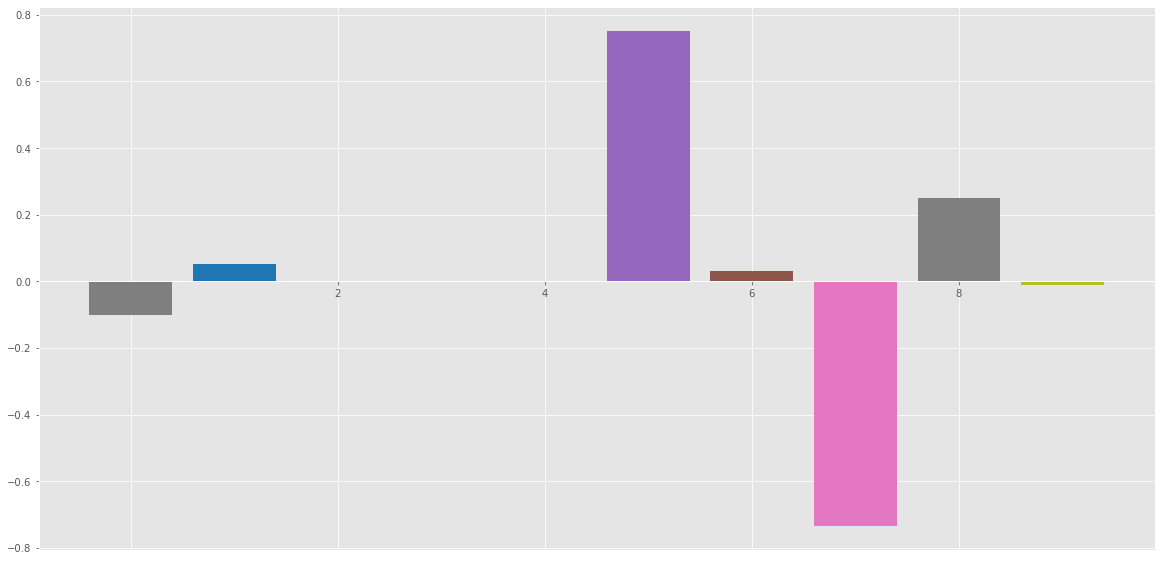

In [29]:
fig, ax = plt.subplots(figsize = (20,10))
color = ['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
        'tab:pink','tab:gray','tab:olive']
ax.bar(lasso_regression_coefficients["Columns"],lasso_regression_coefficients["Coefficient Estimated"],color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [30]:
#Now perform the same process with Lasso regression model:
from sklearn.linear_model import ElasticNet

elastic_regression_model = ElasticNet(alpha = 1)
elastic_regression_model.fit(X_train,Y_train)

ElasticNet(alpha=1)

In [31]:
elastic_regression_prediction = elastic_regression_model.predict(X_test)
mean_squared_error = np.mean((elastic_regression_prediction-Y_test)**2)
print("Mean Squared Error on validation set is: ",mean_squared_error)

Mean Squared Error on validation set is:  23.151874162090394


In [32]:
elastic_regression_coefficients = pd.DataFrame()
elastic_regression_coefficients["Columns"] = raw_df.columns[:-1]
elastic_regression_coefficients["Coefficient Estimated"] = pd.Series(elastic_regression_model.coef_)
print(elastic_regression_coefficients)

   Columns  Coefficient Estimated
0        0              -0.117754
1        1               0.056727
2        2               0.002540
3        3               0.000000
4        4              -0.000000
5        5               0.872248
6        6               0.029403
7        7              -0.799512
8        8               0.288322
9        9              -0.014106


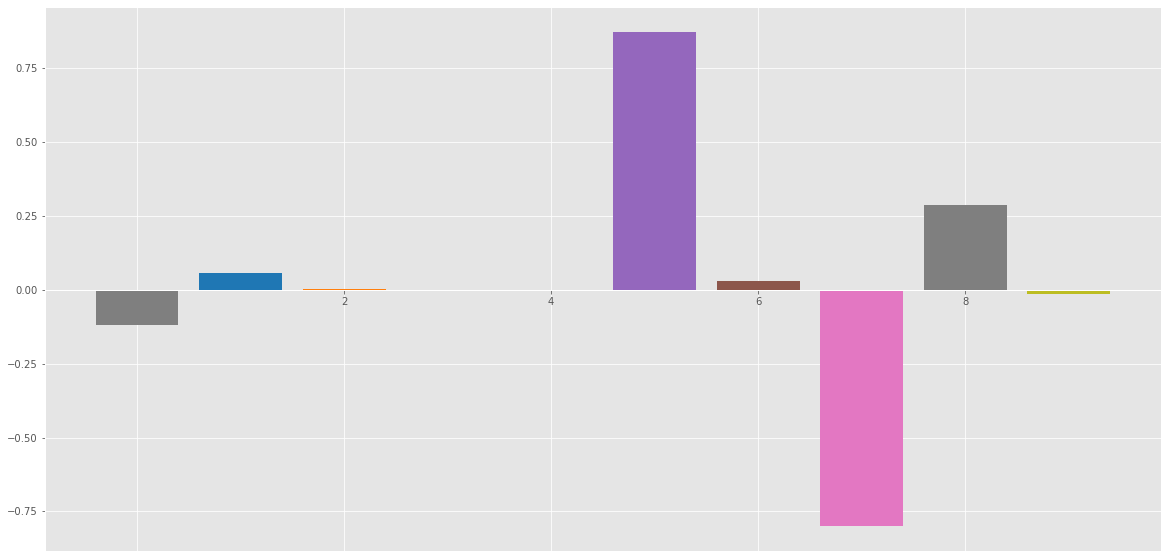

In [33]:
fig, ax = plt.subplots(figsize = (20,10))
color = ['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown',
        'tab:pink','tab:gray','tab:olive']
ax.bar(elastic_regression_coefficients["Columns"],elastic_regression_coefficients["Coefficient Estimated"],color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()